<a href="https://colab.research.google.com/github/monika-arumalla5/Data-Charectarization_Project-2/blob/main/Project_2_Baltimore_Parking_Citation_Analysis_April_2019_Vs_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Overview of the data:
Data consists of the parking citations issued in the City of Baltimore over the last four years. This is a huge data set with a memory of 842.5 MB. However, I am considering only the month of April of the 2019 and 2020 years which reduces the size significantly (approximately to 30 MB).

### Data consists of 26 columns:

•	Citation: 	Citation number issued by the police personnel

•	Tag: 		Vehicle registration plate/tag number

•	ExpMM: 	Vehicle registration expiration month

•	ExpYY: 		Vehicle registration expiration year

•	State: 		State of registration

•	Make:		Vehicle make

•	Address: 	Location where the citation is issued

•	ViolCode:	Violation Code

•	Description:	Description of citation

•	ViolFine:	Original violation fine

•	ViolDate:	Date of violation

•	Balance:	Outstanding balance including original fine and penalty fees

•	PenaltyDate:	Date penalty fee is applied

•	OpenFine:	Unpaid original fine

•	OpenPenalty: 	Unpaid penalty fees

•	NoticeDate:	Date of notice for violation

•	InvestigationStatus:	Investigation status

•	TrialStatus:	 Trial Status

•	GeneralStatus: General status

•	GroupID: 	Group ID

•	ImportDate:	Date record is imported

•	Neighborhood: 	Neighborhood where violation occurred

•	PoliceDistrict: 		Police district where violation occurred

•	CouncilDistrict: 	Council district where the violation occurred

•	Location:	Geographic coordinates where the violation occurred

•	Zip Codes:  	Zip code of the location where violation has occurred

Record count of original data is 4705888. However, the data under the study has record count of 177040.

Size of data under study: 30 MB.

### Proposed objectives of the project:

•	Clean and format the data as necessary.

•	Perform exploratory data analysis to understand the violations distribution across vehicles of different states and see if out of state vehicles have more violations than in state vehicles?

•	To analyze the change in the violation count due to the implementation of lock down due to novel COVID-19 pandemic in 2020 in comparison to 2019.

•	To see if how the violations are distributed across various vehicle makes.

•	To see the frequency of types of violation occurred during the month of April in 2019 and 2020.

•	To analyze the distribution of violation charges and look for any changes observed in 2020 in comparison to 2019.


### Importing the necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
parking_citations = pd.read_csv("https://data.baltimorecity.gov/api/views/n4ma-fj3m/rows.csv") #loading the data 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,18,19,20,21,22,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
parking_citations.head()

,Citation,Tag,ExpMM,ExpYY,State,Make,Address,ViolCode,Description,ViolFine,ViolDate,Balance,PenaltyDate,OpenFine,OpenPenalty,NoticeDate,InvestigationStatus,TrialStatus,GeneralStatus,GroupID,ImportDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location,2010 Census Neighborhoods,2010 Census Wards Precincts,Zip Codes
0,88206835,5CB9762,03,20.0,MD,TOYT,1300 BLK EAST NORTHERN PKWY WB,32,Fixed Speed Camera,40.0,06/17/2019 06:14:00 PM,0.0,NaN,0.0,0.0,07/24/2019,NaN,NaN,NaN,NaN,07/02/2019 04:03:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,88221248,4DC2945,03,20.0,MD,VOLK,1300 BLK EAST NORTHERN PKWY WB,32,Fixed Speed Camera,40.0,06/18/2019 12:12:00 PM,0.0,NaN,0.0,0.0,07/17/2019,NaN,NaN,NaN,NaN,07/02/2019 04:03:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,88221388,9CL8104,09,16.0,MD,HYUN,2800 BLK REISTERSTOWN RD WB,32,Fixed Speed Camera,40.0,06/18/2019 12:17:00 PM,40.0,NaN,40.0,0.0,07/24/2019,NaN,NaN,NaN,NaN,07/02/2019 04:03:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,88236758,S14LDS,04,20.0,NJ,NIS,1500 BLK E COLD SPRING LN EB,32,Fixed Speed Camera,40.0,06/19/2019 07:08:00 AM,40.0,NaN,40.0,0.0,NaN,NaN,NaN,NaN,NaN,07/02/2019 04:03:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,88247052,9BN6360,09,20.0,MD,DODG,1600 BLK E BELVEDERE AVE EB,32,Fixed Speed Camera,40.0,06/19/2019 01:12:00 PM,0.0,NaN,0.0,0.0,07/31/2019,NaN,NaN,NaN,NaN,07/03/2019 04:04:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
parking_citations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4836492 entries, 0 to 4836491
Data columns (total 28 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Citation                     int64  
 1   Tag                          object 
 2   ExpMM                        object 
 3   ExpYY                        float64
 4   State                        object 
 5   Make                         object 
 6   Address                      object 
 7   ViolCode                     int64  
 8   Description                  object 
 9   ViolFine                     float64
 10  ViolDate                     object 
 11  Balance                      float64
 12  PenaltyDate                  float64
 13  OpenFine                     float64
 14  OpenPenalty                  float64
 15  NoticeDate                   object 
 16  InvestigationStatus          object 
 17  TrialStatus                  object 
 18  GeneralStatus                object 
 19  

In [5]:
parking_citations["ViolDate"]

0          06/17/2019 06:14:00 PM
1          06/18/2019 12:12:00 PM
2          06/18/2019 12:17:00 PM
3          06/19/2019 07:08:00 AM
4          06/19/2019 01:12:00 PM
                    ...          
4836487    10/27/2017 07:25:00 PM
4836488    10/27/2017 07:26:00 PM
4836489    10/27/2017 07:26:00 PM
4836490    10/27/2017 07:26:00 PM
4836491    10/27/2017 07:14:00 PM
Name: ViolDate, Length: 4836492, dtype: object

In [6]:
#As the Violation date is of type object, converting it to date time type
parking_citations["ViolDate"] = pd.to_datetime(parking_citations["ViolDate"], format = "%m/%d/%Y %I:%M:%S %p" ) 

In [7]:
#making sure that Violation Date type has been changed to datetime
parking_citations["ViolDate"].head(2)

0   2019-06-17 18:14:00
1   2019-06-18 12:12:00
Name: ViolDate, dtype: datetime64[ns]

### Extracting the violations which happened during the month of April 2019 and 2020

In [8]:
 # Extracting the April month data for the years 2019 and 2020
data = parking_citations[(parking_citations["ViolDate"].dt.month == 4) & (parking_citations["ViolDate"].dt.year.isin([2019,2020]))]

In [9]:
#Looking at the number of violations that occured during April 2019 and April 2020
data["ViolDate"].dt.year.value_counts() 

2019    96532
2020    80517
Name: ViolDate, dtype: int64

In [10]:
data.head()

,Citation,Tag,ExpMM,ExpYY,State,Make,Address,ViolCode,Description,ViolFine,ViolDate,Balance,PenaltyDate,OpenFine,OpenPenalty,NoticeDate,InvestigationStatus,TrialStatus,GeneralStatus,GroupID,ImportDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location,2010 Census Neighborhoods,2010 Census Wards Precincts,Zip Codes
1035,5115119,5AM0281,01,20.0,MD,VOLK,O/S 500 BLK W 28TH ST,22,Expired Tags,32.0,2020-04-25 17:19:00,0.0,NaN,0.0,0.0,06/24/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1444,5453866,5DB3561,10,21.0,MD,TOYT,E/S 410 E BALTIMORE ST,8,No Stopping/Standing Tow Away Zone,52.0,2019-04-07 12:00:00,52.0,NaN,52.0,0.0,06/24/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1452,5454203,1DL1639,08,20.0,MD,HYUN,O/S 225 N EUTAW STREET,18,All Other Parking Meter Violations,32.0,2019-04-01 13:17:00,32.0,NaN,32.0,0.0,06/24/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2410,5496295,37C485,01,20.0,MD,DODG,2803 ELSINORE,22,Expired Tags,32.0,2020-04-21 16:48:00,32.0,NaN,32.0,0.0,07/01/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2853,6324819,8CY2498,09,21.0,MD,TOYT,O/S 001 N HIGHLAND AVE,8,No Stopping/Standing Tow Away Zone,52.0,2020-04-29 08:50:00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning the data

In [11]:
print("Percentage of missing records in each column:")
print((data.isnull().sum()/data.isnull().count())*100)

Percentage of missing records in each column:
Citation                         0.000000
Tag                              0.000565
ExpMM                            0.854001
ExpYY                            0.000565
State                            0.000000
Make                             0.014685
Address                          0.000000
ViolCode                         0.000000
Description                      0.000000
ViolFine                         0.000000
ViolDate                         0.000000
Balance                          0.000000
PenaltyDate                    100.000000
OpenFine                         0.000000
OpenPenalty                      0.000000
NoticeDate                      46.694983
InvestigationStatus             99.826037
TrialStatus                     97.823201
GeneralStatus                   78.096459
GroupID                         78.096459
ImportDate                      45.480630
Neighborhood                    96.346209
PoliceDistrict                

In [12]:
#Based on the above %, dropping all the columns having missing values above 90%

data = data.drop(['Neighborhood', 'PoliceDistrict', 'CouncilDistrict',
       'Location', '2010 Census Neighborhoods', '2010 Census Wards Precincts',
       'Zip Codes','InvestigationStatus', 'TrialStatus','PenaltyDate'],axis=1)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177049 entries, 1035 to 4812956
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Citation       177049 non-null  int64         
 1   Tag            177048 non-null  object        
 2   ExpMM          175537 non-null  object        
 3   ExpYY          177048 non-null  float64       
 4   State          177049 non-null  object        
 5   Make           177023 non-null  object        
 6   Address        177049 non-null  object        
 7   ViolCode       177049 non-null  int64         
 8   Description    177049 non-null  object        
 9   ViolFine       177049 non-null  float64       
 10  ViolDate       177049 non-null  datetime64[ns]
 11  Balance        177049 non-null  float64       
 12  OpenFine       177049 non-null  float64       
 13  OpenPenalty    177049 non-null  float64       
 14  NoticeDate     94376 non-null   object        
 

## Exploratory data analysis of the features

#### Analysing the vehicle's with maximum violations

In [14]:
tag_counts = data["Tag"].value_counts()

In [15]:
tag_counts.describe()

count    128921.000000
mean          1.373306
std           0.937832
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          31.000000
Name: Tag, dtype: float64

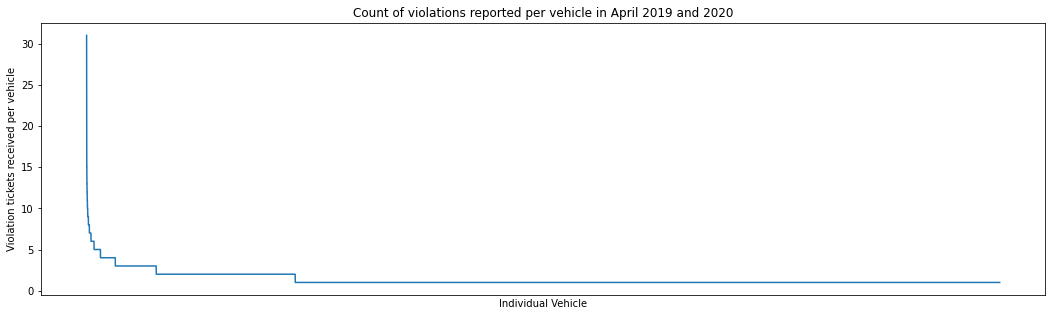

In [16]:
plt.figure(figsize=(18,5))
tag_counts.plot()
plt.title("Count of violations reported per vehicle in April 2019 and 2020")
plt.xticks(ticks=[],values=[])
plt.ylabel("Violation tickets received per vehicle")
plt.xlabel("Individual Vehicle")
plt.show()

#### Comparing the April 2019 violations distribution per vehicle with that of April 2020

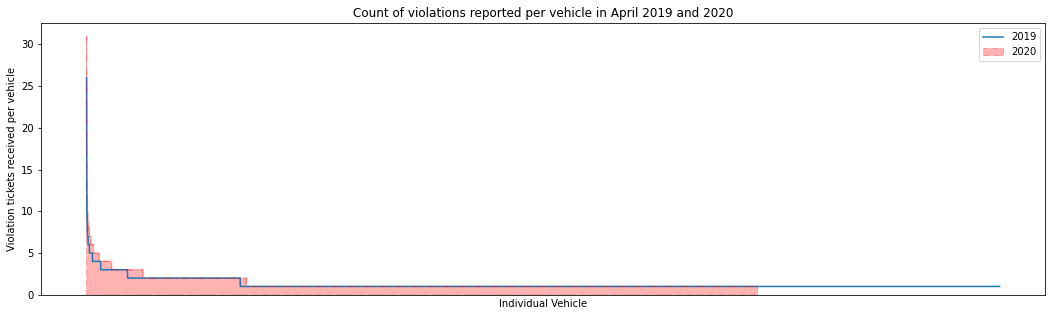

In [17]:
plt.figure(figsize=(18,5))
data[data["ViolDate"].dt.year==2019]["Tag"].value_counts().plot(label="2019")
data[data["ViolDate"].dt.year==2020]["Tag"].value_counts().plot(label="2020",ls="-.",color="red",kind="area",alpha=0.3)
plt.title("Count of violations reported per vehicle in April 2019 and 2020")
plt.xticks(ticks=[],values=[])
plt.ylabel("Violation tickets received per vehicle")
plt.xlabel("Individual Vehicle")
plt.legend()
plt.show()

Noticed that the highest violations received by a individual vehicle is 31 in April 2020, where as 26 in April 2019.

However, most common count of violations committed by a vehicle is 1.

In [18]:
print("Count of violations performed by each vehicle in descending order: \n",data["Tag"].value_counts())

Count of violations performed by each vehicle in descending order: 
 2EC7233     31
2CC1324     29
7DJ2882     26
8DW4455     25
NO TAGST    25
            ..
8ED5574      1
XRAY 5       1
3CS5998      1
6DY7876      1
6DA3935      1
Name: Tag, Length: 128921, dtype: int64


In [19]:
#The types of violations commited by the most violations count vehicle
data[data["Tag"] =="2EC7233" ].groupby("Description")["Description"].count() 

Description
Fixed Speed Camera     24
Red Light Violation     3
Right on Red            4
Name: Description, dtype: int64

In [20]:
#The types of violations commited by the most violations count vehicle
data[data["Tag"] =="2CC1324" ].groupby("Description")["Description"].count() 

Description
Fixed Speed Camera     27
Red Light Violation     1
Right on Red            1
Name: Description, dtype: int64

Noticed that the vehicles which reported maximum violations had performed violations of the types - Fixed Speed Camera, Red Light Violation and Right on Red

#### Analyzing the violations reported per state (vehicle registration state)

In [21]:
print("Count of violations happened per state in the month of April 2019 and 2020: \n")
print(data["State"].value_counts().head(20))

Count of violations happened per state in the month of April 2019 and 2020: 

MD    159119
VA      6102
PA      3174
NJ      1177
NY       899
NC       772
FL       719
DC       555
DE       553
GA       449
TX       363
TN       334
OH       273
WV       270
SC       252
MA       239
CT       233
CA       225
IL       134
MI       123
Name: State, dtype: int64


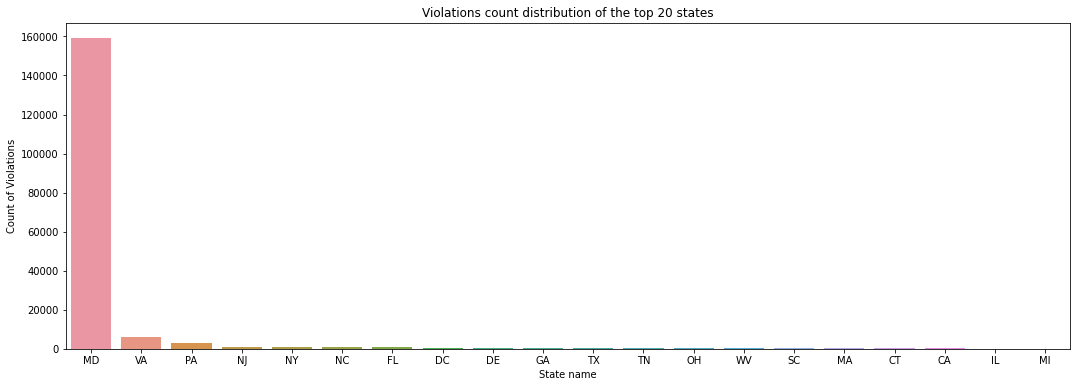

In [22]:
plt.figure(figsize=(18,6))
sns.barplot(y=data["State"].value_counts().head(20).values, x=data["State"].value_counts().head(20).index)
plt.title("Violations count distribution of the top 20 states")
plt.xlabel("State name")
plt.ylabel("Count of Violations")
plt.show()

In [23]:
print("Percentage of vehicle's state registrations:")
print(((data["State"].value_counts()/len(data["State"]))*100).head(20))

Percentage of vehicle's state registrations:
MD    89.872860
VA     3.446504
PA     1.792724
NJ     0.664788
NY     0.507769
NC     0.436037
FL     0.406102
DC     0.313473
DE     0.312343
GA     0.253602
TX     0.205028
TN     0.188648
OH     0.154195
WV     0.152500
SC     0.142333
MA     0.134991
CT     0.131602
CA     0.127083
IL     0.075685
MI     0.069472
Name: State, dtype: float64


From the above percentage statistics, infered that 90% of the parking violations occurred in Baltimore are for vehicles registered with Maryland. 

Followed by Virginia with 3% then by Pensylvania with 1.7%

Hence, one can conclude that In state vehciles committed relatively more parking violations then out of state vehicles

#### Validating if there are any expired registration vehicles

In [24]:
#Analysing the count of expired registration vehicles count:
data[(data["ViolDate"].dt.year==2019)&(data["ExpYY"]<19)]["ExpYY"].count() + data[(data["ViolDate"].dt.year==2020)&(data["ExpYY"]<20)]["ExpYY"].count()

16651

From the data, noticed that there are 16,667 vehicles which have expired registration year.

#### Exploring the vehicle make

In [25]:
data["Make"].value_counts().head(100).index

Index(['HOND', 'FORD', 'TOYT', 'NISS', 'CHEV', 'HYUN', 'JEEP', 'ACUR', 'DODG',
       'HONDA', 'TOYOT', 'KIA', 'BMW', 'NISSA', 'LEXS', 'CHEVR', 'MERZ',
       'VOLK', 'CHRY', 'INFI', 'MAZD', 'GMC', 'SUBA', 'HYUND', 'BUIC', 'AUDI',
       'CADI', 'DODGE', 'ACURA', 'VOLV', 'VOLKS', 'LINC', 'MITS', 'RAM',
       'MERCE', 'MAZDA', 'LEXUS', 'SUBAR', 'MERC', 'CHRYS', 'LEXU', 'INFIN',
       'PONT', 'VOLVO', 'BUICK', 'CADIL', 'STRN', 'LNDR', 'MITSU', 'TRAIL',
       'LINCO', 'MERCU', 'JAGU', 'TOYO', 'SATU', 'SATUR', 'SCION', 'FIAT',
       'MNNI', 'MINI', 'PONTI', 'PORS', 'SCIO', 'MINI-', 'TOY', 'LAND', 'HON',
       'OLDS', 'TESL', 'FOR', 'NIS', 'LEX', 'JAGUA', 'SUZI', 'ROV', 'SUZUK',
       'FREIG', 'SAAB', 'SAA', 'RANGE', 'ISU', 'HUMM', 'SUZU', 'CHE', 'FRHT',
       'INTER', 'INTL', 'OLDSM', 'HYU', 'MASE', 'Toyot', 'PORSC', 'TESLA',
       'JEE', 'TSMR', 'NFLY', 'MACK', 'NEWF', 'Nissa', 'PTRB'],
      dtype='object')

Based on the above value counts, one can notice that the same make type is referred under different names. For example, HONDA and HOND refer the same vehicle manufacturing company. Hence, there is a need for data cleaning.

In [26]:
data["Make"].nunique()

297

Noticed that the same vehicle manufacturer is being referred under multiple names. For example, Acura is being referred as ACU, ACUR along with Acura

Hence, cleaning the make values

In [27]:

#Creating two lists -  one for the current value and the other for replacement value
lt = ["toy","vol","hyu","for","nis","hon","ren","suz","bmw","cha","maz","por","sub","cad","hum","dod","kia","har","mer"]
substitute = ["Toyota","Volkswagen","Hyundai","Ford","Nissan","Honda","Renault","Suzuki","BMW","Changan","Mazda","Porsche","Subaru","Cadlliac","Hummer","Dodge","Kia"
,"Harrley","Mercedes"]
import re

for p,q in zip(lt,substitute):
  pattern = p.upper() + "[A-Z]*" #creating a regex pattern
  data["Make"]=data["Make"].replace(pattern,q,regex=True)


In [28]:
print("Number of vehicle make values after cleaning the data: ")
print(data["Make"].nunique())

Number of vehicle make values after cleaning the data: 
258


In [29]:
data["Make"].value_counts().head(20)

Honda         23633
Toyota        21745
Nissan        18429
Ford          17613
CHEV          13560
Hyundai        9980
Dodge          6182
Volkswagen     5668
JEEP           5495
ACUR           4962
Mercedes       4813
Kia            3900
BMW            3421
Mazda          3229
LEXS           3061
CHEVR          3009
Subaru         2974
CHRY           2748
INFI           2675
GMC            2243
Name: Make, dtype: int64

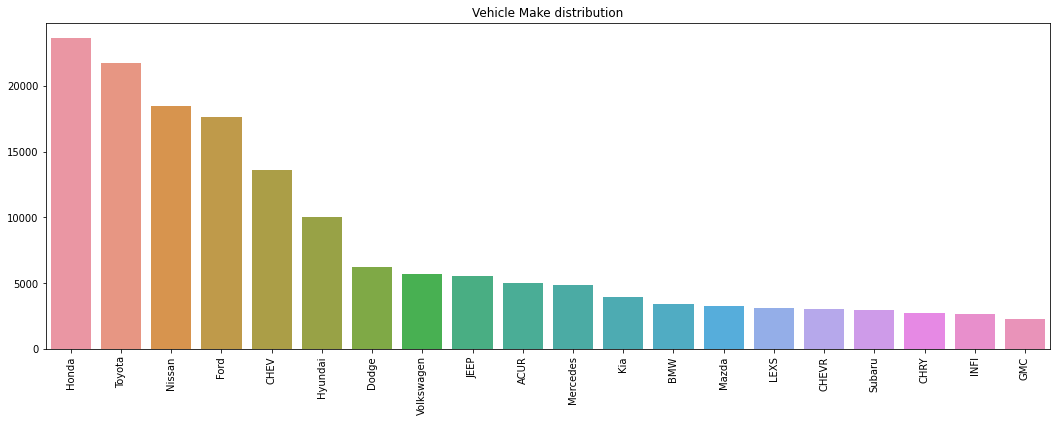

In [30]:
plt.figure(figsize=(18,6))
sns.barplot(x=data["Make"].value_counts().head(20).index,y=data["Make"].value_counts().head(20).values)
plt.title("Vehicle Make distribution")
plt.xticks(rotation=90)
plt.show()

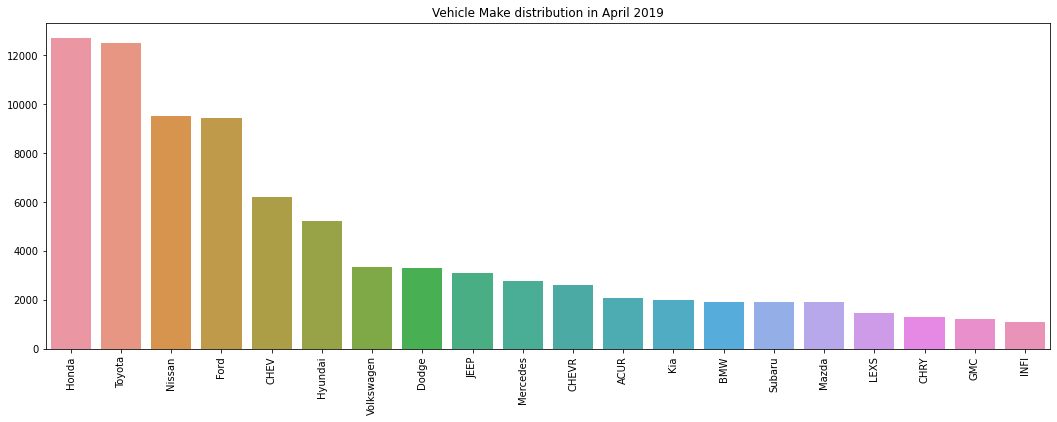

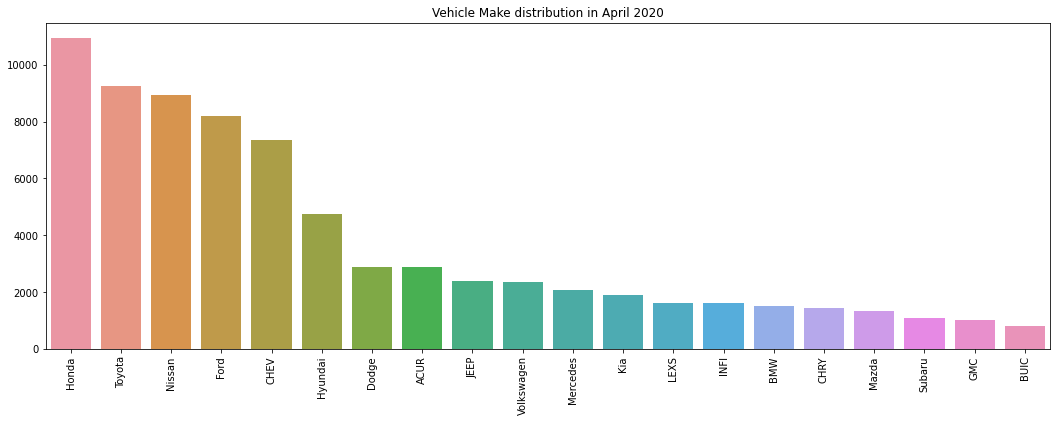

In [31]:
plt.figure(figsize=(18,6))
sns.barplot(x=data[data["ViolDate"].dt.year==2019]["Make"].value_counts().head(20).index,y=data[data["ViolDate"].dt.year==2019]["Make"].value_counts().head(20).values)
plt.title("Vehicle Make distribution in April 2019")
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(18,6))
sns.barplot(x=data[data["ViolDate"].dt.year==2020]["Make"].value_counts().head(20).index,y=data[data["ViolDate"].dt.year==2020]["Make"].value_counts().head(20).values)
plt.title("Vehicle Make distribution in April 2020")
plt.xticks(rotation=90)
plt.show()

From the above visualizations, I conclude that the major violations are reported by the vehicles Honda, Toyota and Nissan

In [32]:
data.columns

Index(['Citation', 'Tag', 'ExpMM', 'ExpYY', 'State', 'Make', 'Address',
       'ViolCode', 'Description', 'ViolFine', 'ViolDate', 'Balance',
       'OpenFine', 'OpenPenalty', 'NoticeDate', 'GeneralStatus', 'GroupID',
       'ImportDate'],
      dtype='object')

#### Analyzing the Violation Codes

In [33]:
print("Count of Violations reported per each violation code")
data["ViolCode"].value_counts()

Count of Violations reported per each violation code


32    100827
31     22135
30     21434
18      9103
27      4674
12      4606
22      3792
8       3029
11      1926
99      1205
46       911
5        645
15       547
17       425
20       334
26       251
3        239
19       238
1        206
6        143
10        93
43        72
47        58
16        56
13        37
9         18
42        18
41        12
23         5
45         2
28         2
44         1
52         1
25         1
4          1
2          1
40         1
Name: ViolCode, dtype: int64

In [34]:
#Checing if there are any null values
data[["ViolCode","Description"]].isnull().sum()

ViolCode       0
Description    0
dtype: int64

In [35]:
data[["ViolCode","Description"]]

,ViolCode,Description
1035,22,Expired Tags
1444,8,No Stopping/Standing Tow Away Zone
1452,18,All Other Parking Meter Violations
2410,22,Expired Tags
2853,8,No Stopping/Standing Tow Away Zone
...,...,...
4812471,12,No Stopping/Standing Not Tow-Away Zone
4812817,46,No Parking/Standing In Bus Stop/Bus Lane
4812818,46,No Parking/Standing In Bus Stop/Bus Lane
4812819,12,No Stopping/Standing Not Tow-Away Zone


In [36]:
data["ViolCode"].nunique()

37

In [37]:
#Creating a dictionary of violation code and it's description
dict_viol_description={}

for x in data["ViolCode"].unique():
  dict_viol_description[x] = data[data["ViolCode"]==x]["Description"].values[0]

In [38]:
dict_viol_description

{1: 'Abandonded Vehicle',
 2: 'No Stopping or No Parking Pimlico Event',
 3: 'Obstruct/Impeding Flow of Traffic',
 4: 'Snow Emergency Route Violation',
 5: 'Obstruct/Impeding Movement of Pedestrian',
 6: 'Fire Lane/Handicapped Violation',
 8: 'No Stopping/Standing Tow Away Zone',
 9: 'Commercial Veh/Residence over 20,000 lbs',
 10: 'Commercial Veh/Residence under 20,000 lbs',
 11: 'Residential Parking Permit Only',
 12: 'No Stopping/Standing Not Tow-Away Zone',
 13: 'Blocking Garage or Driveway',
 15: 'No Stopping//Parking Stadium Event Camden',
 16: 'No Parking/Standing In Transit Stop',
 17: 'Less Than 15 feet from Fire Hydrant',
 18: 'All Other Parking Meter Violations',
 19: 'Exceeding 48 Hours',
 20: 'Passenger Loading Zone',
 22: 'Expired Tags',
 23: 'In Taxicab Stand',
 25: 'Less 30’ from Intersection',
 26: 'No Stop/Park Handicap',
 27: 'No Stop/Park Street Cleaning',
 28: 'No Stop/Stand/Park Cruising',
 30: 'Red Light Violation',
 31: 'Right on Red',
 32: 'Fixed Speed Camera',

In [39]:
#Creating a data frame of violation code and its count
violation_code_count = pd.DataFrame(data["ViolCode"].value_counts())

In [40]:
violation_code_count = violation_code_count.reset_index()
violation_code_count.columns=["index","counts"]

In [41]:
violation_code_count["violation description"] = violation_code_count["index"].map(dict_viol_description)

In [42]:
print("The type of violations occured: ")
violation_code_count["Percentage"] = round((violation_code_count["counts"]*100)/violation_code_count["counts"].sum(),2)
violation_code_count[["violation description","counts","Percentage"]]

The type of violations occured: 


,violation description,counts,Percentage
0,Fixed Speed Camera,100827,56.95
1,Right on Red,22135,12.50
2,Red Light Violation,21434,12.11
3,All Other Parking Meter Violations,9103,5.14
4,No Stop/Park Street Cleaning,4674,2.64
5,No Stopping/Standing Not Tow-Away Zone,4606,2.60
6,Expired Tags,3792,2.14
7,No Stopping/Standing Tow Away Zone,3029,1.71
8,Residential Parking Permit Only,1926,1.09
9,All Other Stopping or Parking Violations,1205,0.68


In [43]:
#Comparing violations that occured in April 2019 to April 2020
violation_code_count_2019 = pd.DataFrame(data[data["ViolDate"].dt.year==2019]["ViolCode"].value_counts())

violation_code_count_2020 = pd.DataFrame(data[data["ViolDate"].dt.year==2020]["ViolCode"].value_counts())

In [44]:
violation_code_count_2019.reset_index(inplace=True)
violation_code_count_2020.reset_index(inplace=True)

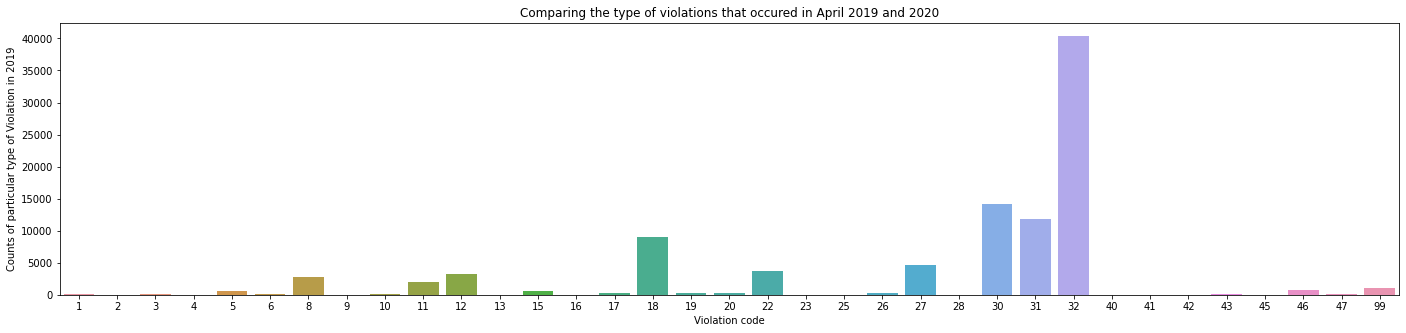

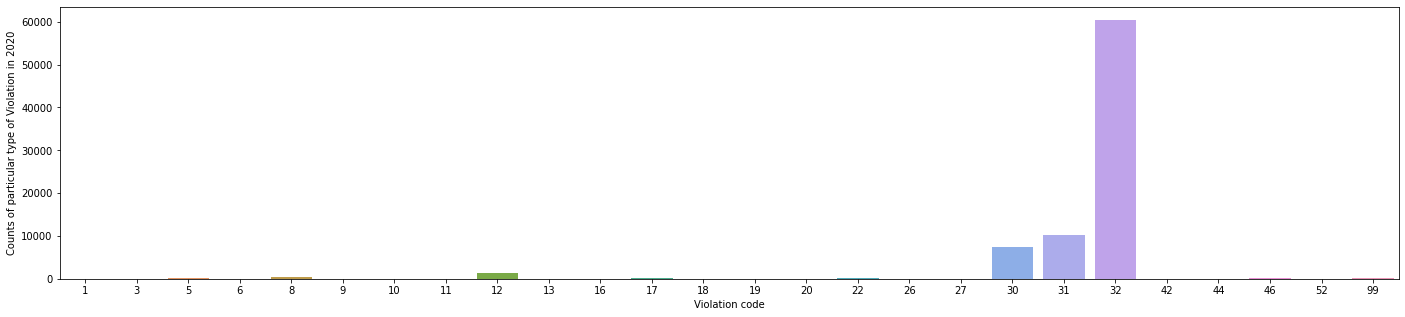

In [45]:
plt.figure(figsize=(24,5))
sns.barplot(x=violation_code_count_2019.sort_values("index")["index"],y=violation_code_count_2019.sort_values("index")["ViolCode"],label=2019)
plt.ylabel("Counts of particular type of Violation in 2019")
plt.xlabel("Violation code")
plt.title("Comparing the type of violations that occured in April 2019 and 2020")
plt.show()
plt.figure(figsize=(24,5))
sns.barplot(x=violation_code_count_2020.sort_values("index")["index"],y=violation_code_count_2020.sort_values("index")["ViolCode"],label=2020)
plt.ylabel("Counts of particular type of Violation in 2020")
plt.xlabel("Violation code")
plt.show()

For both April 2019 and 2020, noticed that the majority type of violation is Fixed Speed Camera(56%).
Following it, are the Red Light Violation (12%) and Right on Red violations (12%).

Comparison studies:

During the lockdown in April 2020, noticed that violations like Expired tags, Parking meter violations, Residential parking permit and No Stopping/Standing Tow Away Zone only, reduced significantly (as shown in the above graph).











In [46]:
data.columns

Index(['Citation', 'Tag', 'ExpMM', 'ExpYY', 'State', 'Make', 'Address',
       'ViolCode', 'Description', 'ViolFine', 'ViolDate', 'Balance',
       'OpenFine', 'OpenPenalty', 'NoticeDate', 'GeneralStatus', 'GroupID',
       'ImportDate'],
      dtype='object')

#### Performing time series analysis of the violations reported per day

In [47]:
data["ViolDate_only"] = data["ViolDate"].dt.date
data["ViolDate_only"] = pd.to_datetime(data["ViolDate_only"])

In [48]:
violations_per_day = data[[ 'ViolDate_only', "ViolCode"]].groupby("ViolDate_only").count()
violations_per_day.reset_index(inplace=True)

In [49]:
violations_per_day["ViolDate_only"] = pd.to_datetime(violations_per_day["ViolDate_only"])

In [50]:
violations_per_day.columns = ["Date","Count"]

violations_per_day.head(5)

,Date,Count
0,2019-04-01,3824
1,2019-04-02,3849
2,2019-04-03,4327
3,2019-04-04,3966
4,2019-04-05,4084


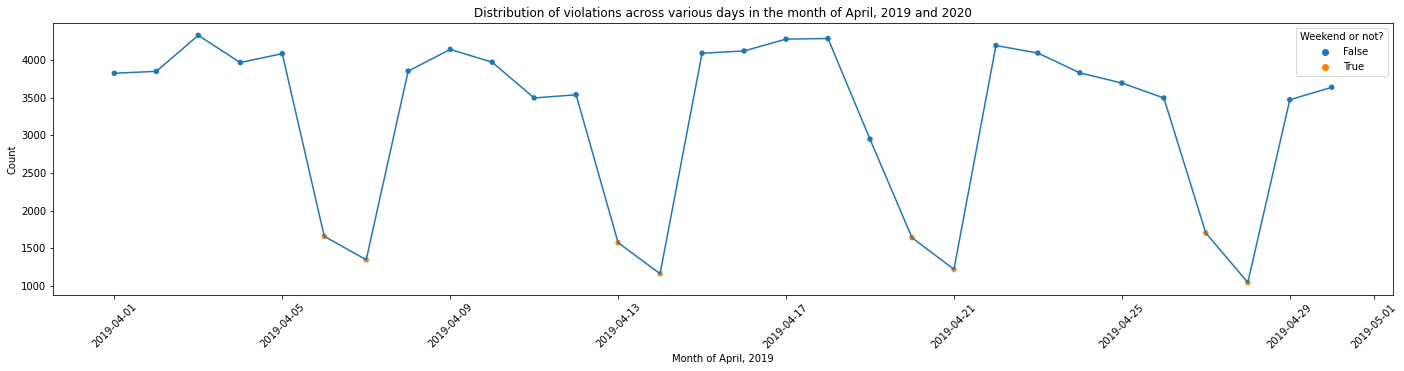

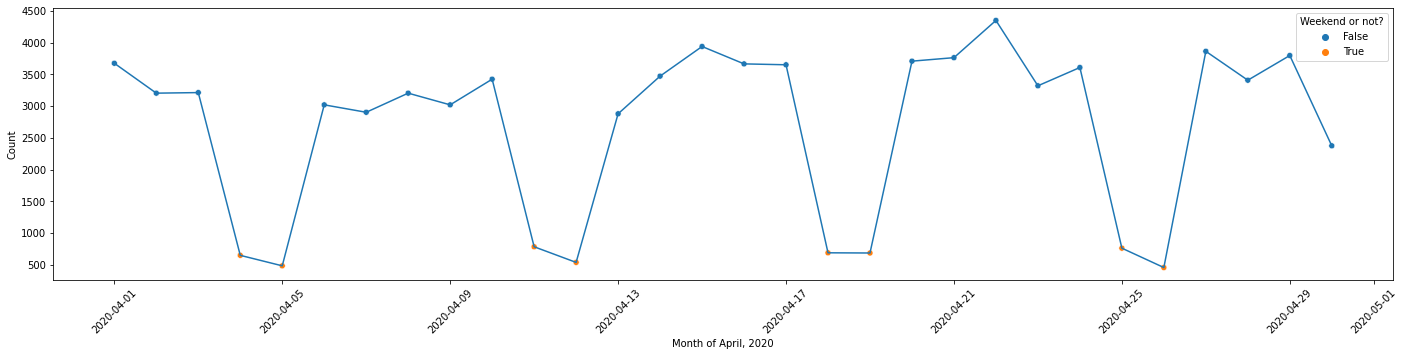

In [51]:
plt.figure(figsize=(24,5))
sns.scatterplot(data=violations_per_day[violations_per_day["Date"].dt.year==2019], y="Count",x="Date",hue=violations_per_day[(violations_per_day["Date"].dt.year==2019)]["Date"].dt.dayofweek.isin([5,6]))
sns.lineplot(data=violations_per_day[violations_per_day["Date"].dt.year==2019], y="Count",x="Date")
plt.legend(title="Weekend or not?")
plt.xticks(rotation=45)
plt.title("Distribution of violations across various days in the month of April, 2019 and 2020")
plt.xlabel("Month of April, 2019")
plt.show()
plt.figure(figsize=(24,5))
sns.scatterplot(data=violations_per_day[violations_per_day["Date"].dt.year==2020], y="Count",x="Date",hue=violations_per_day[(violations_per_day["Date"].dt.year==2020)]["Date"].dt.dayofweek.isin([5,6]))
sns.lineplot(data=violations_per_day[violations_per_day["Date"].dt.year==2020], y="Count",x="Date")
plt.legend(title="Weekend or not?")
plt.xlabel("Month of April, 2020")
plt.xticks(rotation=45)
plt.show()

Noticed that there is a significant drop in violations on weekends when compared to weekdays!

In April, 2020 noticed a trend of increased violations every week in comparison to the previous week.

In [52]:
violations_per_day.head()

,Date,Count
0,2019-04-01,3824
1,2019-04-02,3849
2,2019-04-03,4327
3,2019-04-04,3966
4,2019-04-05,4084


In [53]:
violations_per_day.tail()

,Date,Count
55,2020-04-26,458
56,2020-04-27,3863
57,2020-04-28,3408
58,2020-04-29,3797
59,2020-04-30,2375


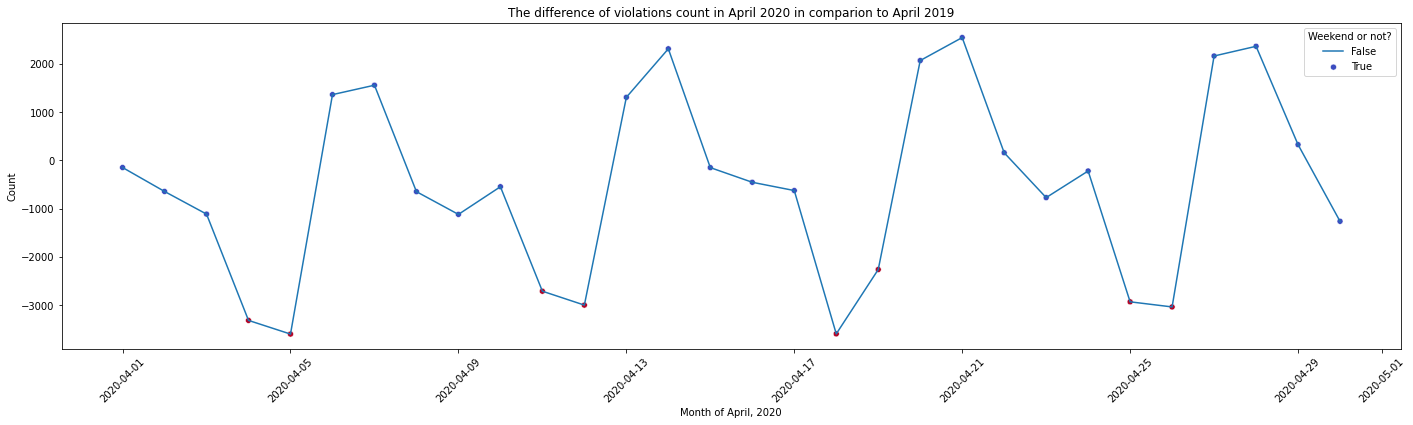

In [54]:
plt.figure(figsize=(24,6))
sns.lineplot(y=violations_per_day["Count"].diff(30),x=violations_per_day["Date"][30:])
sns.scatterplot(y=violations_per_day["Count"].diff(30),x=violations_per_day["Date"][30:],hue=violations_per_day["Date"][30:].dt.dayofweek.isin([5,6]),palette="coolwarm")
plt.legend(title="Weekend or not?",labels=["False","True"])
plt.title("The difference of violations count in April 2020 in comparion to April 2019")
plt.xlabel("Month of April, 2020")
plt.xticks(rotation=45)
plt.show()

In [55]:
#As I observed a weekly seasonality, removing the seasonal variations and plotting the data

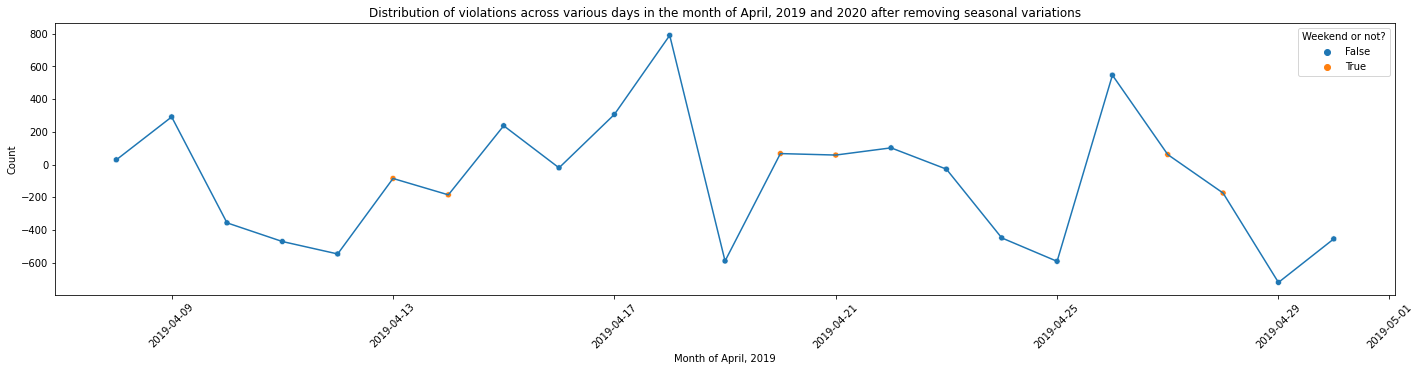

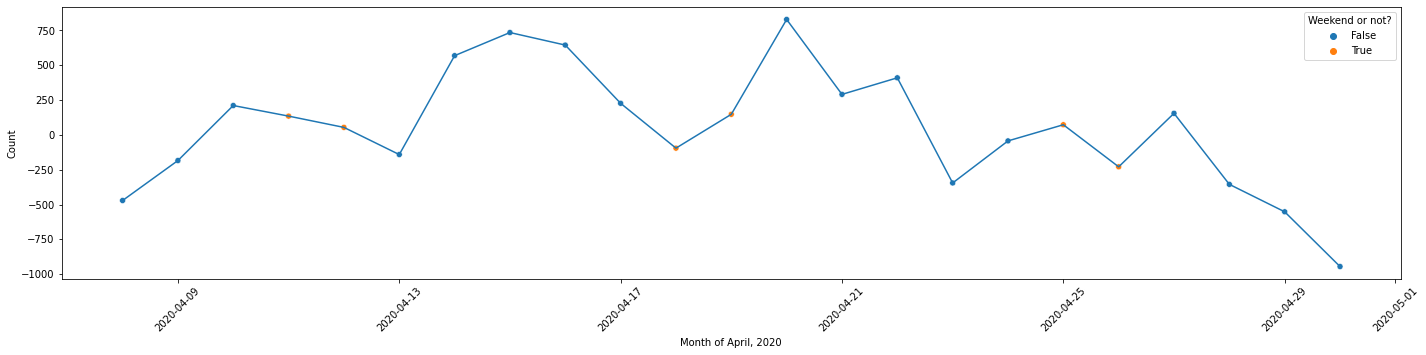

In [56]:
plt.figure(figsize=(24,5))
sns.scatterplot(data=violations_per_day[violations_per_day["Date"].dt.year==2019], y=violations_per_day[violations_per_day["Date"].dt.year==2019]["Count"].diff(7),x="Date",hue=violations_per_day[(violations_per_day["Date"].dt.year==2019)]["Date"].dt.dayofweek.isin([5,6]))
sns.lineplot(data=violations_per_day[violations_per_day["Date"].dt.year==2019], y=violations_per_day[violations_per_day["Date"].dt.year==2019]["Count"].diff(7),x="Date")
plt.legend(title="Weekend or not?")
plt.xticks(rotation=45)
plt.title("Distribution of violations across various days in the month of April, 2019 and 2020 after removing seasonal variations")
plt.xlabel("Month of April, 2019")
plt.show()
plt.figure(figsize=(24,5))
sns.scatterplot(data=violations_per_day[violations_per_day["Date"].dt.year==2020], y=violations_per_day[violations_per_day["Date"].dt.year==2020]["Count"].diff(7),x="Date",hue=violations_per_day[(violations_per_day["Date"].dt.year==2020)]["Date"].dt.dayofweek.isin([5,6]))
sns.lineplot(data=violations_per_day[violations_per_day["Date"].dt.year==2020], y=violations_per_day[violations_per_day["Date"].dt.year==2020]["Count"].diff(7),x="Date")
plt.legend(title="Weekend or not?")
plt.xlabel("Month of April, 2020")
plt.xticks(rotation=45)
plt.show()

### Is there a change in fine amount in April, 2020 in comparison to 2019?

In [57]:
a = pd.DataFrame(data[data["ViolDate"].dt.year==2020].groupby(["ViolCode"])["ViolFine"].unique())
fines_cost_2019_2020 = pd.DataFrame(data[data["ViolDate"].dt.year==2019].groupby(["ViolCode"])["ViolFine"].unique()).join(a,on="ViolCode",rsuffix="_2020")

In [58]:
fines_cost_2019_2020

def issame(x):
  if x[0]==x[1]:
    return True
  else:
    return False

fines_cost_2019_2020["IsSame"] = fines_cost_2019_2020[["ViolFine","ViolFine_2020"]].apply(issame,axis=1)

In [59]:
fines_cost_2019_2020

,ViolFine,ViolFine_2020,IsSame
ViolCode,,,
1,[302.0],[302.0],True
2,[102.0],NaN,False
3,[102.0],[102.0],True
4,[77.0],NaN,False
5,[77.0],[77.0],True
6,[77.0],[77.0],True
8,[52.0],[52.0],True
9,[502.0],[502.0],True
10,[252.0],[252.0],True


Noticed no difference in Fine cost in April 2020 in comparison to April 2019.

In [60]:
data.head()

,Citation,Tag,ExpMM,ExpYY,State,Make,Address,ViolCode,Description,ViolFine,ViolDate,Balance,OpenFine,OpenPenalty,NoticeDate,GeneralStatus,GroupID,ImportDate,ViolDate_only
1035,5115119,5AM0281,01,20.0,MD,Volkswagen,O/S 500 BLK W 28TH ST,22,Expired Tags,32.0,2020-04-25 17:19:00,0.0,0.0,0.0,06/24/2020,NaN,NaN,NaN,2020-04-25
1444,5453866,5DB3561,10,21.0,MD,Toyota,E/S 410 E BALTIMORE ST,8,No Stopping/Standing Tow Away Zone,52.0,2019-04-07 12:00:00,52.0,52.0,0.0,06/24/2020,NaN,NaN,NaN,2019-04-07
1452,5454203,1DL1639,08,20.0,MD,Hyundai,O/S 225 N EUTAW STREET,18,All Other Parking Meter Violations,32.0,2019-04-01 13:17:00,32.0,32.0,0.0,06/24/2020,NaN,NaN,NaN,2019-04-01
2410,5496295,37C485,01,20.0,MD,Dodge,2803 ELSINORE,22,Expired Tags,32.0,2020-04-21 16:48:00,32.0,32.0,0.0,07/01/2020,NaN,NaN,NaN,2020-04-21
2853,6324819,8CY2498,09,21.0,MD,Toyota,O/S 001 N HIGHLAND AVE,8,No Stopping/Standing Tow Away Zone,52.0,2020-04-29 08:50:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2020-04-29


### In what hour of the day are maximum violations reported?

In [61]:
data["Hour"] = data["ViolDate"].dt.hour

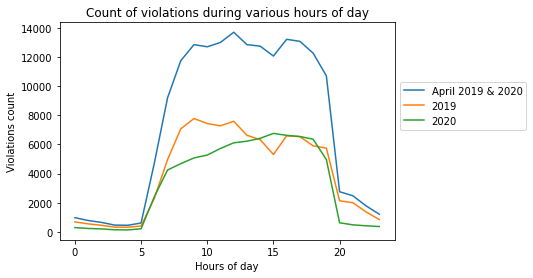

In [62]:
sns.lineplot(x=data["Hour"].value_counts().index,y=data["Hour"].value_counts().values,label="April 2019 & 2020")
sns.lineplot(x=data[data["ViolDate"].dt.year==2019]["Hour"].value_counts().index,y=data[data["ViolDate"].dt.year==2019]["Hour"].value_counts().values,label="2019")
sns.lineplot(x=data[data["ViolDate"].dt.year==2020]["Hour"].value_counts().index,y=data[data["ViolDate"].dt.year==2020]["Hour"].value_counts().values,label="2020")
plt.legend(bbox_to_anchor=(1,0.75))
plt.title("Count of violations during various hours of day")
plt.xlabel("Hours of day")
plt.ylabel("Violations count")
plt.show()

From the above visualization, one can observe that most of the violations happen between 8 AM to 7 PM

In April, 2019 more violations happened during morning hours and drops by 2 PM. However, April, 2020 more violations happened in the evening hours 3 PM - 7 PM.

#### Analysing the distribution of period from violation reported and the date the notice is issued?

In [63]:
#Converting Notice Date to a datetime type
data["NoticeDate"] = pd.to_datetime(data["NoticeDate"])

In [64]:
data["Period_between_viol_notice"] = data["NoticeDate"] - data["ViolDate_only"]

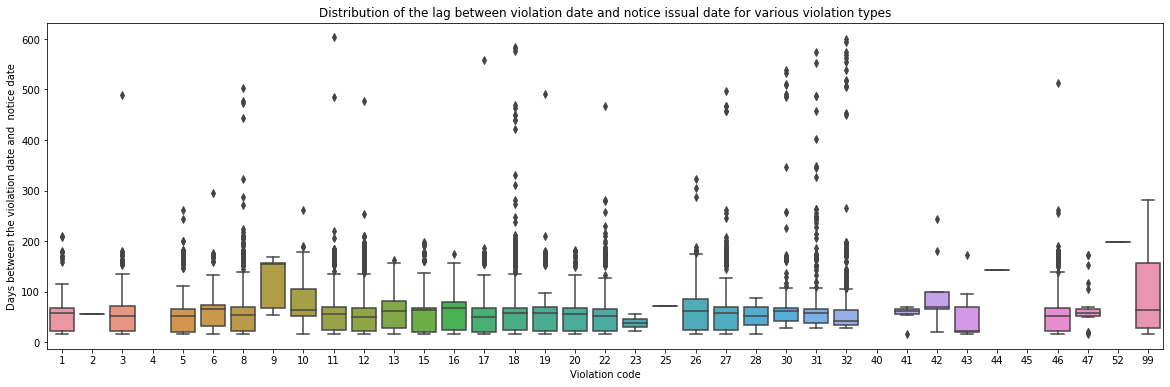

In [65]:
plt.figure(figsize=(20,6))
sns.boxplot(y=data["Period_between_viol_notice"].dt.days,x=data["ViolCode"])
plt.title("Distribution of the lag between violation date and notice issual date for various violation types")
plt.xlabel("Violation code")
plt.ylabel("Days between the violation date and  notice date")
plt.show()

In [66]:
data.groupby("ViolCode")["Period_between_viol_notice"].describe().transpose()

ViolCode,1,2,3,4,5,6,8,9,10,11,12,13,15,16,17,18,19,20,22,23,25,26,27,28,30,31,32,40,41,42,43,44,45,46,47,52,99
count,142,1,135,0,351,87,1536,10,62,981,2569,24,256,34,257,4990,133,161,2521,2,1,126,2735,2,11811,12527,51650,0,8,8,53,1,0,467,40,1,694
mean,57 days 20:27:02.535211268,55 days 00:00:00,63 days 01:36:00,NaT,55 days 04:26:40,67 days 08:33:06.206896552,60 days 14:34:41.250000,121 days 02:24:00,81 days 08:54:11.612903226,61 days 23:17:25.871559633,54 days 02:10:36.200856364,63 days 14:00:00,61 days 10:41:15,65 days 07:45:52.941176471,55 days 17:10:58.365758755,60 days 07:18:20.921843687,72 days 14:47:49.172932331,57 days 22:57:23.478260870,47 days 19:00:41.412138040,38 days 00:00:00,71 days 00:00:00,73 days 07:02:51.428571429,61 days 01:56:53.089579525,52 days 00:00:00,57 days 07:29:45.826771654,53 days 13:10:17.578031452,48 days 19:55:26.218780251,NaT,56 days 06:00:00,98 days 00:00:00,39 days 18:06:47.547169811,143 days 00:00:00,NaT,58 days 22:18:14.646680942,65 days 08:24:00,199 days 00:00:00,81 days 21:14:00.345821326
std,40 days 12:36:22.917154050,NaT,59 days 16:02:17.838564156,NaT,45 days 21:32:01.910064298,46 days 14:13:32.518674049,49 days 10:42:32.704179781,49 days 11:54:35.139177124,56 days 01:48:47.039655759,48 days 00:45:39.634325626,44 days 21:43:21.399815040,39 days 22:13:20.161329350,47 days 12:51:47.028210547,47 days 05:26:13.624918492,53 days 04:27:57.101055646,44 days 19:17:04.222797995,63 days 11:13:07.535383124,38 days 16:37:20.141001574,31 days 14:22:55.922118010,24 days 00:59:56.880413602,NaT,59 days 23:12:34.556225586,44 days 22:39:35.229144090,50 days 21:52:49.864405275,20 days 04:44:53.181383459,20 days 18:08:14.904750889,21 days 05:16:04.824078792,NaT,17 days 05:51:25.625523938,74 days 12:50:02.176198538,30 days 05:44:41.497254457,NaT,NaT,50 days 18:17:00.159203619,33 days 21:30:30.287773029,NaT,60 days 06:03:01.542314888
min,16 days 00:00:00,55 days 00:00:00,16 days 00:00:00,NaT,16 days 00:00:00,16 days 00:00:00,16 days 00:00:00,54 days 00:00:00,16 days 00:00:00,16 days 00:00:00,16 days 00:00:00,16 days 00:00:00,16 days 00:00:00,16 days 00:00:00,16 days 00:00:00,16 days 00:00:00,16 days 00:00:00,16 days 00:00:00,16 days 00:00:00,21 days 00:00:00,71 days 00:00:00,16 days 00:00:00,16 days 00:00:00,16 days 00:00:00,27 days 00:00:00,27 days 00:00:00,27 days 00:00:00,NaT,16 days 00:00:00,20 days 00:00:00,16 days 00:00:00,143 days 00:00:00,NaT,16 days 00:00:00,16 days 00:00:00,199 days 00:00:00,16 days 00:00:00
25%,21 days 00:00:00,55 days 00:00:00,21 days 00:00:00,NaT,20 days 00:00:00,31 days 12:00:00,21 days 00:00:00,67 days 00:00:00,51 days 18:00:00,23 days 00:00:00,21 days 00:00:00,28 days 12:00:00,20 days 00:00:00,23 days 18:00:00,20 days 00:00:00,23 days 00:00:00,21 days 00:00:00,22 days 00:00:00,21 days 00:00:00,29 days 12:00:00,71 days 00:00:00,24 days 18:00:00,23 days 00:00:00,34 days 00:00:00,41 days 00:00:00,38 days 00:00:00,34 days 00:00:00,NaT,54 days 18:00:00,64 days 18:00:00,20 days 00:00:00,143 days 00:00:00,NaT,21 days 00:00:00,51 days 00:00:00,199 days 00:00:00,28 days 06:00:00
50%,58 days 00:00:00,55 days 00:00:00,51 days 00:00:00,NaT,52 days 00:00:00,65 days 00:00:00,54 days 00:00:00,154 days 12:00:00,64 days 00:00:00,56 days 00:00:00,50 days 00:00:00,61 days 00:00:00,64 days 00:00:00,67 days 00:00:00,50 days 00:00:00,57 days 00:00:00,58 days 00:00:00,56 days 00:00:00,51 days 00:00:00,38 days 00:00:00,71 days 00:00:00,61 days 12:00:00,58 days 00:00:00,52 days 00:00:00,61 days 00:00:00,57 days 00:00:00,41 days 00:00:00,NaT,61 days 12:00:00,69 days 12:00:00,22 days 00:00:00,143 days 00:00:00,NaT,52 days 00:00:00,57 days 00:00:00,199 days 00:00:00,64 days 00:00:00
75%,68 days 00:00:00,55 days 00:00:00,71 days 12:00:00,NaT,66 days 00:00:00,74 days 00:00:00,69 days 00:00:00,157 days 00:00:00,104 days 18:00:00,69 days 00:00:00,67 days 00:00:00,80 days 18:00:00,67 days 12:00:00,78 days 18:00:00,68 days 00:00:00,68 days 00:00:00,70 days 00:00:00,68 days 00:00:00,65 days 00:00:00,46 days 12

From the above visualization, noticed that the violations such as 

18: 'All Other Parking Meter Violations', 30: 'Red Light Violation', 
 31: 'Right on Red', 
 32: 'Fixed Speed Camera'  
 
 are having a lot of outliers as extreme as 574 days ie., violation notice is rolled out nearly 19 months after the violation

In [67]:
print("Violation code description for reference: ")
dict_viol_description

Violation code description for reference: 


{1: 'Abandonded Vehicle',
 2: 'No Stopping or No Parking Pimlico Event',
 3: 'Obstruct/Impeding Flow of Traffic',
 4: 'Snow Emergency Route Violation',
 5: 'Obstruct/Impeding Movement of Pedestrian',
 6: 'Fire Lane/Handicapped Violation',
 8: 'No Stopping/Standing Tow Away Zone',
 9: 'Commercial Veh/Residence over 20,000 lbs',
 10: 'Commercial Veh/Residence under 20,000 lbs',
 11: 'Residential Parking Permit Only',
 12: 'No Stopping/Standing Not Tow-Away Zone',
 13: 'Blocking Garage or Driveway',
 15: 'No Stopping//Parking Stadium Event Camden',
 16: 'No Parking/Standing In Transit Stop',
 17: 'Less Than 15 feet from Fire Hydrant',
 18: 'All Other Parking Meter Violations',
 19: 'Exceeding 48 Hours',
 20: 'Passenger Loading Zone',
 22: 'Expired Tags',
 23: 'In Taxicab Stand',
 25: 'Less 30’ from Intersection',
 26: 'No Stop/Park Handicap',
 27: 'No Stop/Park Street Cleaning',
 28: 'No Stop/Stand/Park Cruising',
 30: 'Red Light Violation',
 31: 'Right on Red',
 32: 'Fixed Speed Camera',

## Is there a drop in violations in April, 2020 due to lockdown?

In [68]:
print("Violations reported in April, 2019: ",data[data["ViolDate"].dt.year == 2019]["Citation"].count())

Violations reported in April, 2019:  96532


In [69]:
print("Violations reported in April, 2020: ",data[data["ViolDate"].dt.year == 2020]["Citation"].count())

Violations reported in April, 2020:  80517


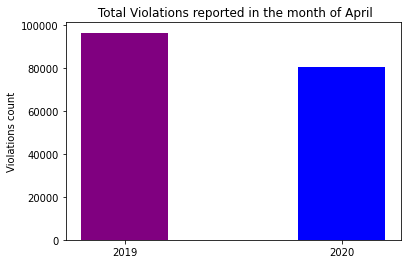

In [70]:
plt.bar(color=["purple","blue"],height=[data[data["ViolDate"].dt.year == 2019]["Citation"].count(),data[data["ViolDate"].dt.year == 2020]["Citation"].count()],x=[0,2])
plt.xticks(ticks=[0,2],labels=[2019,2020])
plt.ylabel("Violations count")
plt.title(" Total Violations reported in the month of April")
plt.show()


In [71]:
drop = abs((data[data["ViolDate"].dt.year == 2020]["Citation"].count() - data[data["ViolDate"].dt.year == 2019]["Citation"].count())/data[data["ViolDate"].dt.year == 2019]["Citation"].count())
print("Noticed a drop of percentage : ", round(drop*100,2), "% in April 2020 than April 2019" )

Noticed a drop of percentage :  16.59 % in April 2020 than April 2019


## Statistical Analysis - Hypothesis testing

### Does vehicle's state have a relation with type of violation committed?

As both State and Violation code are categorical variables, we need to use chi-squared test.

Null hypothesis: There is no relation between State and te Violation codes (Violation types)

Alternate hypothesis: There is relation between state the vehicle is registered and the violation types committed.

alpha level = 0.05

In [72]:
! pip install researchpy
import researchpy

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [73]:
data.columns

Index(['Citation', 'Tag', 'ExpMM', 'ExpYY', 'State', 'Make', 'Address',
       'ViolCode', 'Description', 'ViolFine', 'ViolDate', 'Balance',
       'OpenFine', 'OpenPenalty', 'NoticeDate', 'GeneralStatus', 'GroupID',
       'ImportDate', 'ViolDate_only', 'Hour', 'Period_between_viol_notice'],
      dtype='object')

In [74]:
d1,d2 = researchpy.crosstab(data["State"],data["ViolCode"],test="chi-square")

In [75]:
d2

,Chi-square test,results
0,Pearson Chi-square ( 2124.0) =,23063.0267
1,p-value =,0.0000
2,Cramer's V =,0.0602


As p-value is less than alpha level, we reject the null hypothesis and infer that the state where the the vehicle is registered and the type of violations committed have a relationship.

As the Cramer's V is close to zero, there is only slight relationship between vehicle's registration state and violations committed.

#### Is there a significant drop in violations committed in April 2020 in comparison to April, 2019 due to the COVID-19 pandemic?

Null hypothesis: There is no change in violations committed in April 2020 in comparison to April, 2019 

Alternate Hypothesis: There is a change in violations committed in April 2020 in comparison to April, 2019 

alpha level = 0.05


In [76]:
#Grouping the violations performed by each state in April 2019 and April 2020 respectively
g1 = data[data["ViolDate"].dt.year == 2019].groupby("State")["ViolDate"].count().sort_index()  
g2 = data[data["ViolDate"].dt.year == 2020].groupby("State")["ViolDate"].count().sort_index()

In [77]:
d3, d4 =researchpy.ttest(g1,g2,"2019","2020",paired=True)

In [78]:
d3

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,2019,54.0,1787.444444,11681.524141,1589.654087,-1400.997871,4975.886760
1,2020,54.0,1491.055556,9946.568944,1353.556589,-1223.835150,4205.946261
2,diff,54.0,296.388889,1742.956601,237.186351,-179.346684,772.124462


In [79]:
d4[:4]

,Paired samples t-test,results
0,Difference (2019 - 2020) =,296.3889
1,Degrees of freedom =,53.0000
2,t =,1.2496
3,Two side test p value =,0.2169


As p value is greater than alpha (0.05), we fail to reject the null hypothesis.

Hence, one can conclude that there is no significant difference between the violations committed in April 2019 to that of April, 2020 per state.

## Summary of the Project:


*   On analyzing the maximum number of violations that are committed by each vehicle, notice that most vehicles performed 1 violation however, there are few vehicles which performed as high as 31 violations in a month.
*   On analysing the vehicle registration state, noticed that most violations that happened in Baltimore city are done by vehicles registered under the home state ie., Maryland (90%), followed by the nearby states Virginia (3%) and Pensylvania (1.7%). Also, noticed that there is a slight relationship between vehicle's state and the type of violation committed.

*   Noticed that majority violations are performed by the vehicles of Make - Honda, Toyota and Nissan.

*   More than 50% of violations are of the type: Fixed Speed Camera (56%), followed by Red light violation (12%) and Right on Red (12%).


*   Noticed that most of the violations happen during weekdays and during 8 AM - 7 PM hours. In april, 2019 majority of violations happened between 8 AM - 2 PM, however in April 2020, majority violations happened during 3 PM - 7 PM.

*   Noticed there are few incidents in which  red light violation, fixed camera violation etc.  where the notice was issued nearly 19 months after the violation incident.


*   Finally, due to the lock down during COVID-19 pandemic in the month of April 2020, noticed a overall drop of 16.59% in the violations reported in comparison to April, 2019. However, there is no statistical significance at alpha = 0.05 per state.
















